In [9]:
from scipy.io import loadmat

data = loadmat('training_data.mat')
x_train = data['x'].flatten()  
y_train = data['y'].flatten()

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Create a Vandermonde matrix
X_train = np.vander(x_train, 9, increasing=True)  

theta_hat = np.linalg.lstsq(X_train, y_train, rcond=None)[0]

In [33]:
theta_hat

array([  0.60775979,  -7.25862115,  15.3450059 ,  17.26526602,
       -46.39728808, -10.63103168,  41.47282583,   1.75929095,
       -11.22913232])

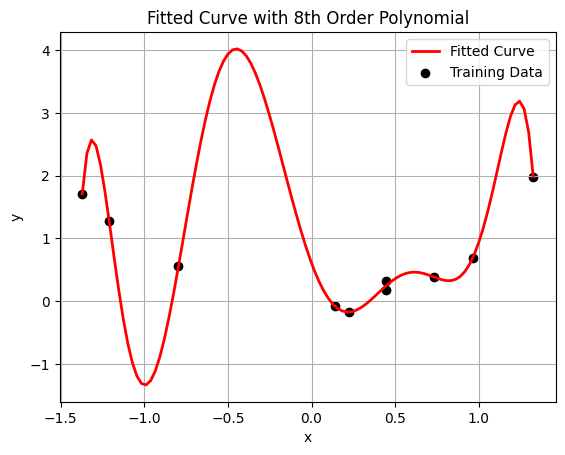

In [11]:
# Plot the fitted curve
x_fit = np.linspace(x_train.min(), x_train.max(), 100)
X_fit = np.vander(x_fit, 9, increasing=True)
y_fit = X_fit @ theta_hat

plt.figure()
plt.plot(x_fit, y_fit, 'r-', linewidth=2)  # Fitted curve
plt.scatter(x_train, y_train, color='k')  # Training data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Curve with 8th Order Polynomial')
plt.legend(['Fitted Curve', 'Training Data'])
plt.grid(True)
plt.show()

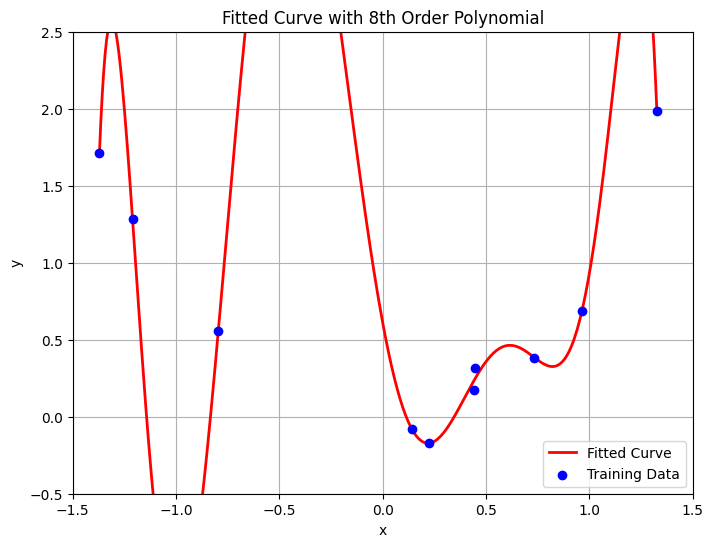

In [14]:
# Generate a range of x values for plotting the fitted curve
x_plot = np.linspace(x_train.min(), x_train.max(), 400)
# Create the design matrix for the plot
X_plot = np.vander(x_plot, 9, increasing=True)

# Calculate the y values for the plot using the fitted coefficients
y_plot = X_plot.dot(theta_hat)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, 'r-', label='Fitted Curve', linewidth=2)
plt.scatter(x_train, y_train, color='blue', label='Training Data', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Curve with 8th Order Polynomial')
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 2.5)
plt.grid(True)
plt.show()

In [18]:
test_data = loadmat('test_data.mat')

x_test = test_data['x_test'].flatten()
y_test = test_data['y_test'].flatten()

X_test = np.vander(x_test, 9, increasing=True)
y_pred = X_test.dot(theta_hat)
test_error = np.linalg.norm(y_pred - y_test)
print(f"Test Error: {test_error}")

Test Error: 4.560738896701371


In [20]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

lambdas = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 0.3, 0.5, 0.8, 1, 2, 5, 10, 15, 20, 50, 100]

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_errors = []

for lam in lambdas:
    ridge = Ridge(alpha=lam)
    fold_errors = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        ridge.fit(X_train_fold, y_train_fold)
        y_pred_fold = ridge.predict(X_test_fold)
        fold_errors.append(np.mean((y_pred_fold - y_test_fold)**2))
    cv_errors.append(np.mean(fold_errors))

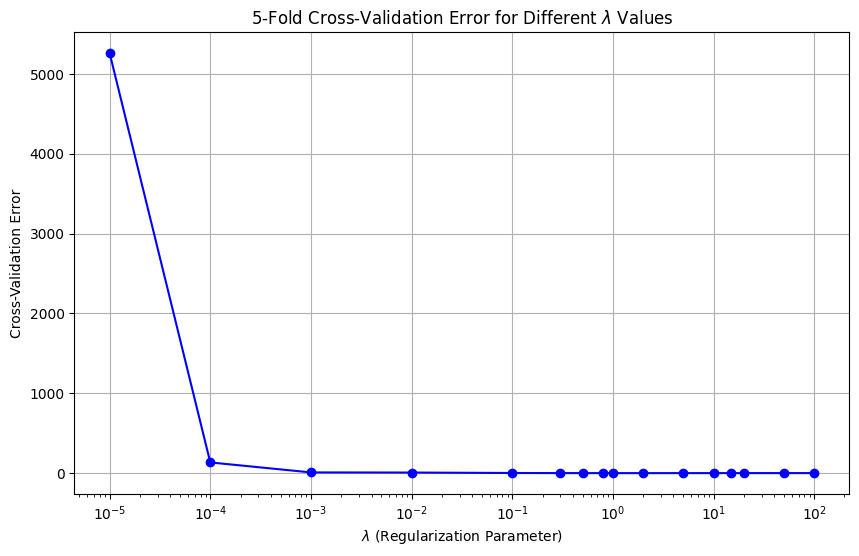

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(lambdas, cv_errors, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Set the x-axis to log-scale
plt.xlabel(r'$\lambda$ (Regularization Parameter)')
plt.ylabel('Cross-Validation Error')
plt.title('5-Fold Cross-Validation Error for Different $\lambda$ Values')
plt.grid(True)
plt.show()

In [23]:
best_lambda_index = np.argmin(cv_errors)
best_lambda = lambdas[best_lambda_index]
print(f"Best lambda: {best_lambda}")

Best lambda: 2


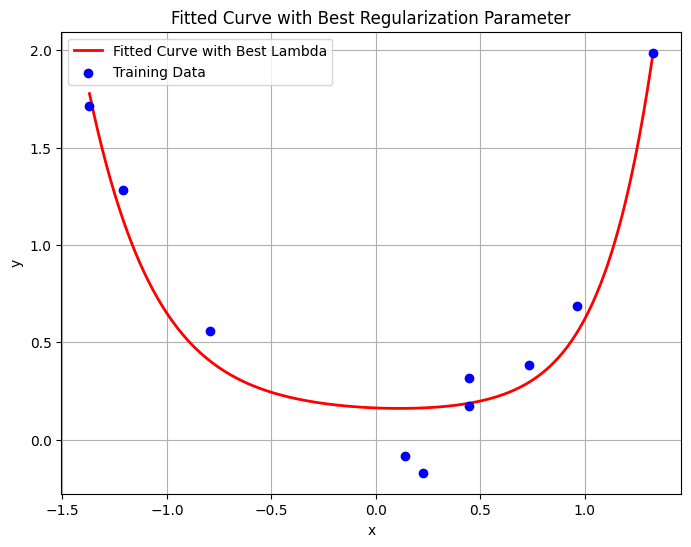

In [25]:
ridge_best = Ridge(alpha=best_lambda)
ridge_best.fit(X_train, y_train)

y_best_pred = ridge_best.predict(X_plot)
plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_best_pred, 'r-', label='Fitted Curve with Best Lambda', linewidth=2)
plt.scatter(x_train, y_train, color='blue', label='Training Data', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Curve with Best Regularization Parameter')
plt.legend()
plt.grid(True)
plt.show()

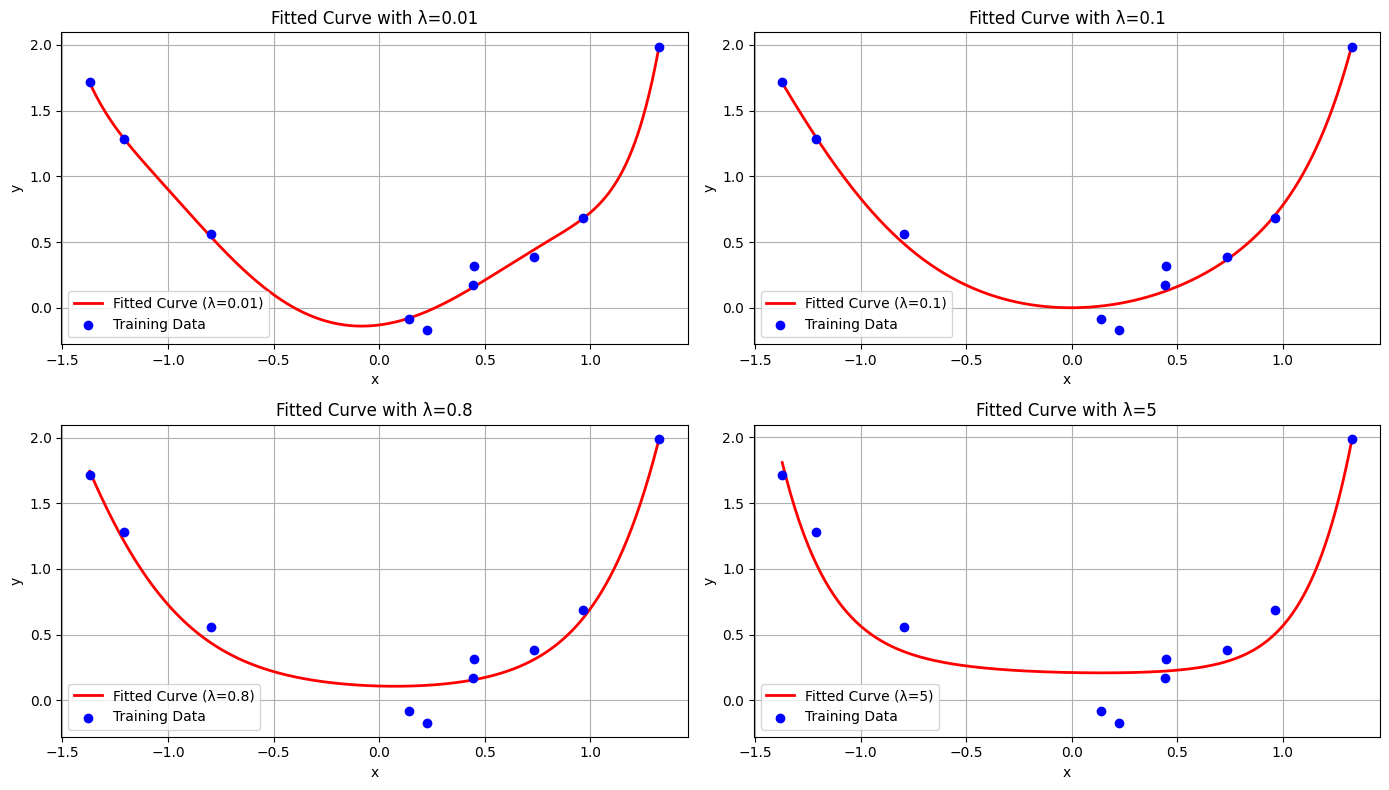

In [26]:
lambdas_to_plot = [0.01, 0.1, 0.8, 5]

x_plot = np.linspace(x_train.min(), x_train.max(), 400)
X_plot = np.vander(x_plot, 9, increasing=True)

plt.figure(figsize=(14, 8))

for lam in lambdas_to_plot:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_plot)
    
    plt.subplot(2, 2, lambdas_to_plot.index(lam) + 1)
    plt.plot(x_plot, y_pred, 'r-', label=f'Fitted Curve (λ={lam})', linewidth=2)
    plt.scatter(x_train, y_train, color='blue', label='Training Data', zorder=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Fitted Curve with λ={lam}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

for lam in lambdas_to_plot:
    ridge = Ridge(alpha=lam)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"λ={lam}, MSE: {-scores.mean()}")

λ=0.01, MSE: 0.14935931104884917
λ=0.1, MSE: 0.1276180784297951
λ=0.8, MSE: 0.07928278143755477
λ=5, MSE: 0.12748784529016616


In [28]:
lambdas_to_evaluate = [0.01, 0.1, 0.8, 5]
test_errors = []

for lam in lambdas_to_evaluate:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train, y_train)  # Re-fit the model with the current lambda
    y_pred = ridge.predict(X_test)
    test_errors.append(np.mean((y_pred - y_test) ** 2))

print("Test Errors for each lambda:")
for lam, error in zip(lambdas_to_evaluate, test_errors):
    print(f"Lambda: {lam}, Test MSE: {error}")

Test Errors for each lambda:
Lambda: 0.01, Test MSE: 0.04410926529975627
Lambda: 0.1, Test MSE: 0.04021179004610607
Lambda: 0.8, Test MSE: 0.040551902406536354
Lambda: 5, Test MSE: 0.05019667263268211
